<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Filtros_e_DFT_(2a_parte)_novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy import signal, fftpack, io
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

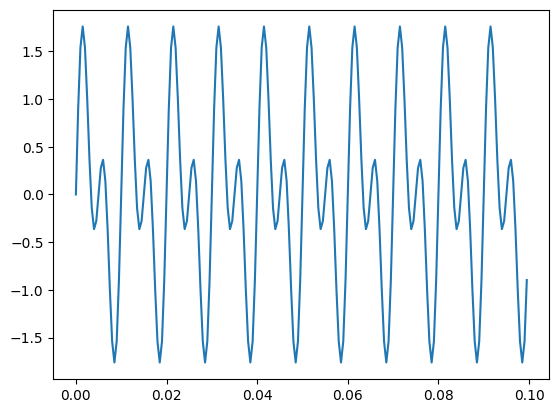

In [ ]:
Fs = 2000 # taxa de amostragem
f0 = 100 # frequência da senoide
fase_ini = 0 # ângulo de fase inicial
ampl = 1 # amplitude da senoide
durt = 0.1 # duração do sinal
Ts = 1/Fs # Periodo de amostragem
num_passos = np.round(durt*Fs).astype(int) # número de passos
n = np.arange(0,num_passos,1) # índices amostrais
x_sine_1 =  ampl*np.sin(2*np.pi * f0 * n*Ts + fase_ini)
x_sine_2 =  ampl*np.sin(2*np.pi * 2*f0 * n*Ts + fase_ini) # Dobro da frequencia de x_sine_1
t = n*Ts # escala de tempo do sinal
composicao = x_sine_1+x_sine_2
plt.plot(t, x_sine_1+x_sine_2)

# Efeitos da resposta de fase não linear dos filtros IIR sobre a temporização de eventos


Criando um filtro passa-baixas com fase não linear:

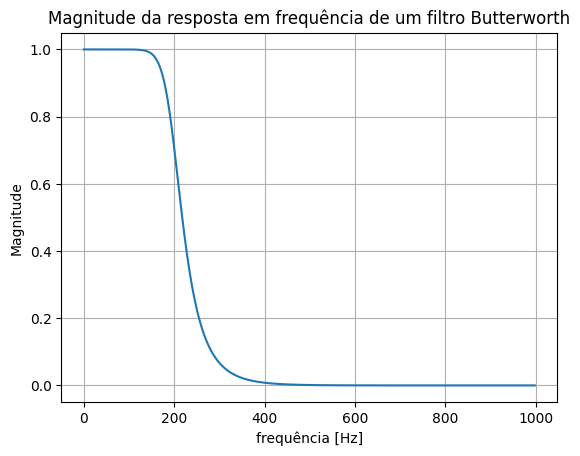

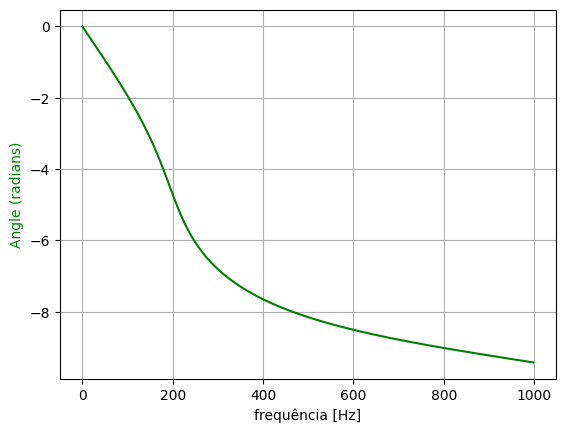

<ipython-input-4-ab07572c3204>:22: UserWarning: The filter's denominator is extremely small at frequencies [3.135],             around which a singularity may be present
  w, gd = signal.group_delay((B, A))


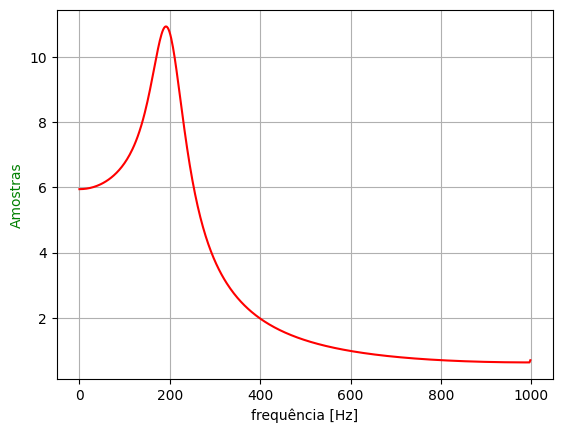

In [ ]:
freq_Nyq = Fs/2
f_c = 200/freq_Nyq
[B,A] = signal.butter(6,f_c, 'lowpass') # frequência de corte em 200Hz

w, H = signal.freqz(B, A)
f= freq_Nyq*(w/np.pi)
plt.plot(f, abs(H))

plt.title('Magnitude da resposta em frequência de um filtro Butterworth')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

angles = np.unwrap(np.angle(H))
plt.plot(f, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('frequência [Hz]')
plt.grid()
plt.show()

w, gd = signal.group_delay((B, A))
plt.plot(f, gd, 'r')
plt.ylabel('Amostras', color='g')
plt.xlabel('frequência [Hz]')
plt.grid()
plt.show()

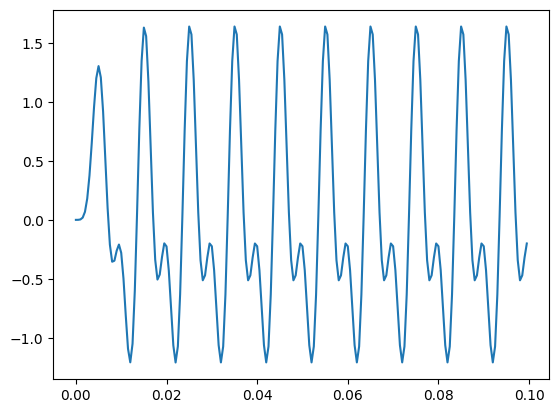

In [ ]:
composicao_filtrada = signal.lfilter(B, A, composicao)
plt.plot(t,composicao_filtrada)

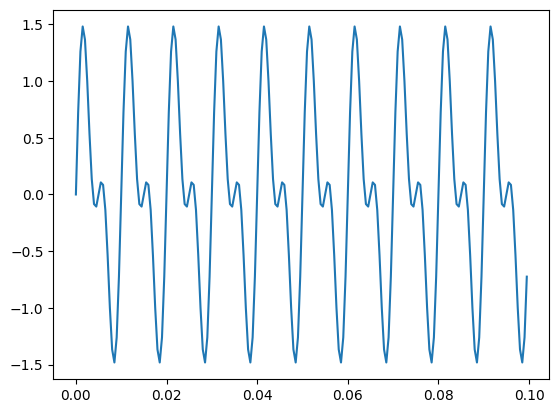

In [ ]:
comparacao = x_sine_1+ x_sine_2/np.sqrt(2)
plt.plot(t,comparacao)

Filtragem com fase zero:

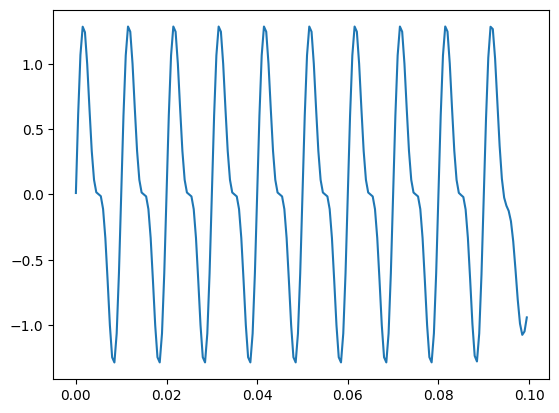

In [ ]:
composicao_filtrada_fase_zero = signal.filtfilt(B, A, composicao)
plt.plot(t,composicao_filtrada_fase_zero)

Exemplo de sinal senoidal:

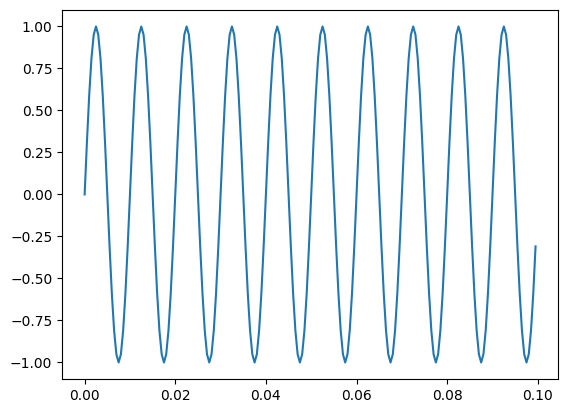

In [ ]:
Fs = 2000 # taxa de amostragem
f0 = 100 # frequência da senoide
fase_ini = 0 # ângulo de fase inicial
ampl = 1 # amplitude da senoide
durt = 0.1 # duração do sinal
Ts = 1/Fs # Periodo de amostragem
num_passos = np.round(durt*Fs).astype(int) # número de passos
n = np.arange(0,num_passos,1) # índices amostrais
x_sine =  ampl*np.sin(2*np.pi * f0 * n*Ts + fase_ini)
t = n*Ts # escala de tempo do sinal
plt.plot(t, x_sine)

Text(0.5, 1.0, 'Espectro de magnitude em frequência')

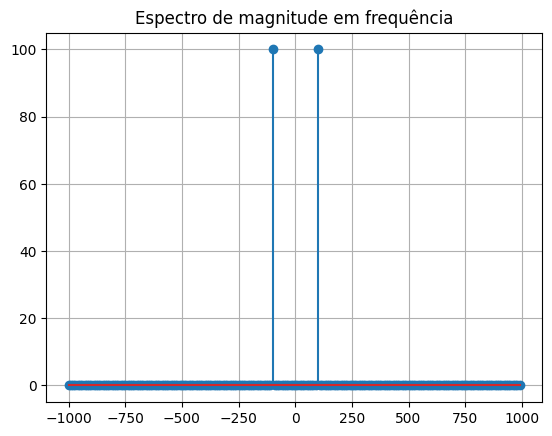

In [ ]:
# DFT através do scipy
N = len(x_sine)
DFT_sine = fftpack.fft(x_sine,N)
mag_espectro = np.abs(DFT_sine)
f = fftpack.fftfreq(N, 1 / Fs)
plt.stem(fftpack.fftshift(f),fftpack.fftshift(mag_espectro))
plt.grid()
plt.title('Espectro de magnitude em frequência')

Reconstrução através da IDFT:

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


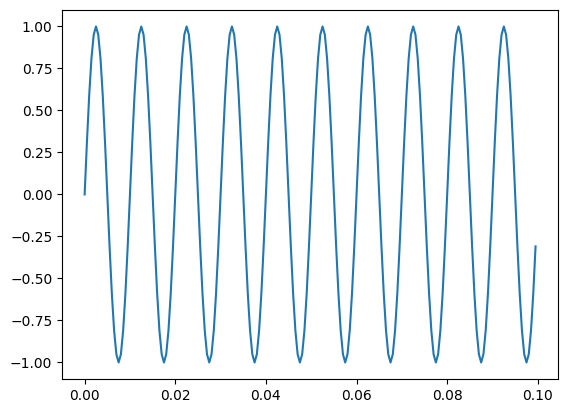

In [ ]:
x_sine_est = fftpack.ifft(DFT_sine)
plt.plot(t, x_sine_est)

# Filtros FIR

Gerando um filtro FIR:  
A função firls constrói um filtro FIR com fase linear através da técnica de mínimos quadrados (least-squares).  
É uma opção para o projeto de filtros FIR, mas não a única (ver firwin e remez, por exemplo)  
Chamada da função: scipy.signal.firls(numtaps, bands, desired, weight=None, nyq=None, fs=None):

In [31]:
# Projeto de um filtro FIR usando firls
Fs = 44100
F_Nyq = Fs/2
# Exemplo de passa-baixa com 101 taps (coeficientes)
B = signal.firls(101,(0, 5000/F_Nyq, 6000/F_Nyq, 1),(1, 1, 0.01, 0.01))
C = signal.firls(101,(0, 5000/F_Nyq, 6000/F_Nyq, 1),(0.0001, 0.0001, 1, 1))


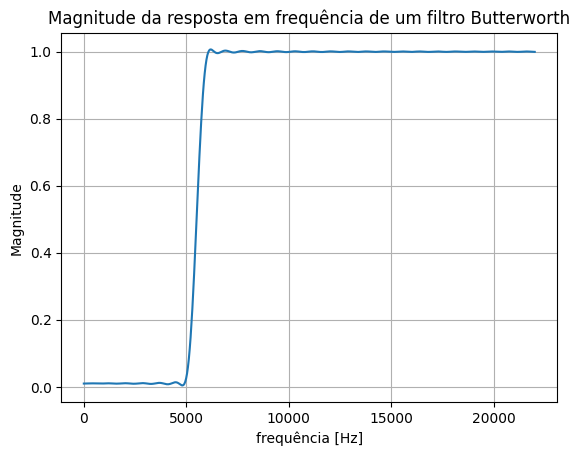

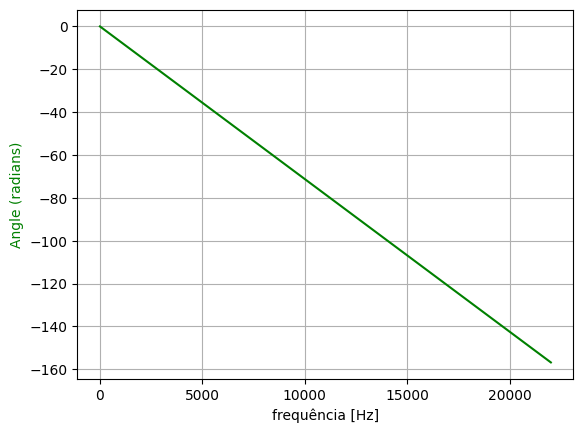

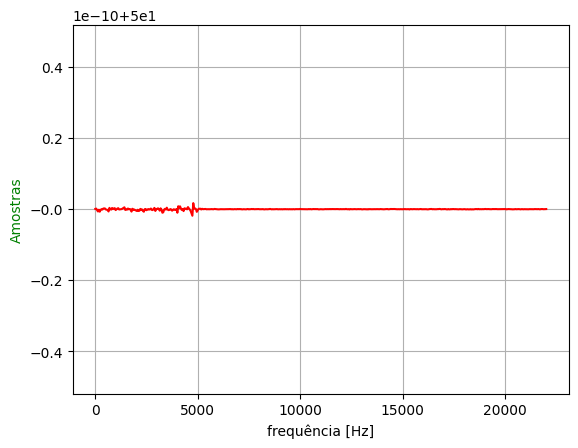

In [13]:
w, H = signal.freqz(C, 1)
f= F_Nyq*(w/np.pi)
plt.plot(f, abs(H))

plt.title('Magnitude da resposta em frequência de um filtro Butterworth')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

angles = np.unwrap(np.angle(H))
plt.plot(f, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.xlabel('frequência [Hz]')
plt.grid()
plt.show()

w, gd = signal.group_delay((C, 1))
plt.plot(f, gd, 'r')
plt.ylabel('Amostras', color='g')
plt.xlabel('frequência [Hz]')
plt.grid()
plt.show()

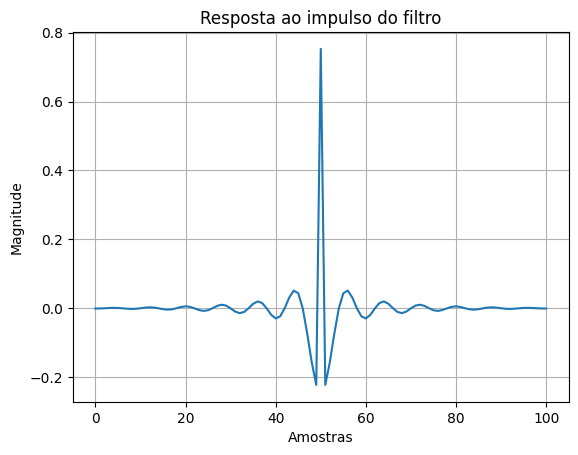

In [17]:
plt.title('Resposta ao impulso do filtro')
plt.plot(C)
plt.ylabel('Magnitude')
plt.xlabel('Amostras')
plt.grid()
plt.show()

Carregando sinal de áudio:

In [9]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded)) # Get name of the uploaded file

Saving Bernard Purdie - Bernards BackBeat (part1).wav to Bernard Purdie - Bernards BackBeat (part1).wav


In [15]:
[fs_audio,audio]=wavfile.read(filename)
audio = audio[:,0] # Pegando só o canal da esquerda
audio = audio.astype(np.float32)
Audio(audio, rate=fs_audio)

In [19]:
audio_agudo = signal.lfilter(C, 1, audio)
Audio(audio_agudo, rate=fs_audio)

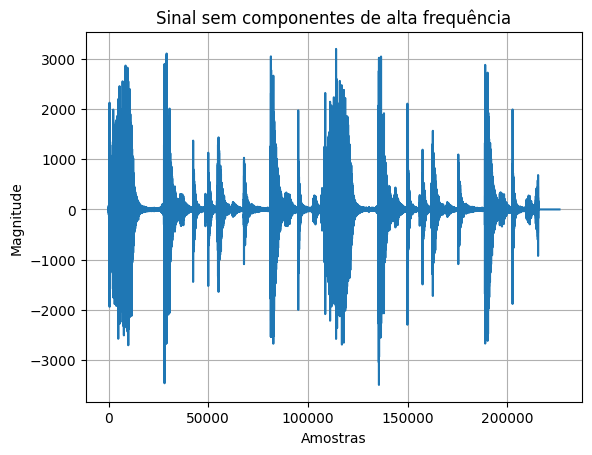

In [20]:
plt.title('Sinal sem componentes de alta frequência')
plt.plot(audio_agudo)
plt.ylabel('Magnitude')
plt.xlabel('Amostras')
plt.grid()
plt.show()

# Filtragem no domínio da frequência


In [34]:
# Espectros do sinal e do núcleo do filtro
L = max(len(audio),len(C)) # Tamanho máximo entre os sinais
X_DFT = fftpack.fft(audio,L)
H_DFT = fftpack.fft(C,L)

# Multiplicação ponto a ponto
prod_XH = X_DFT * H_DFT

# Transformada inversa
y = np.real(fftpack.ifft(prod_XH)) # Espera-se um sinal real, mas a IFFT pode gerar valores residuais imaginários.
# Usamos a função np.real para retirar esses valores residuais (caso existam).

In [35]:
Audio(y, rate=fs_audio)

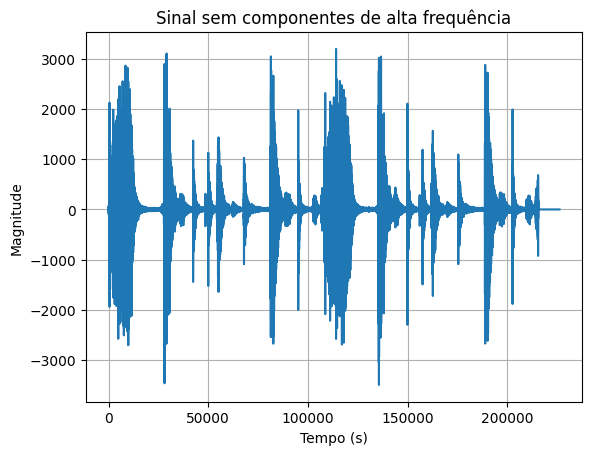

In [23]:
plt.title('Sinal sem componentes de alta frequência')
plt.plot(y)
plt.ylabel('Magnitude')
plt.xlabel('Tempo (s)')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Espectro de magnitude em frequência')

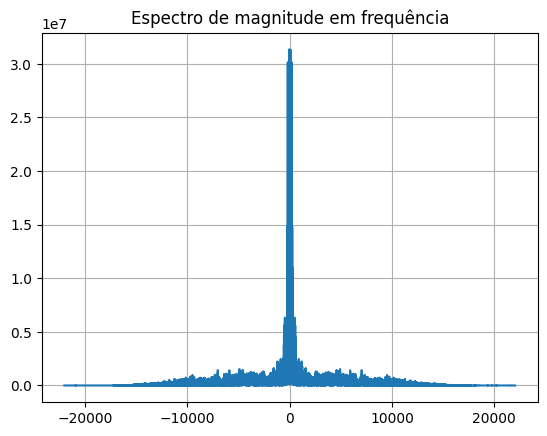

In [28]:
# DFT através do scipy
N = len(audio)
DFT_signal = fftpack.fft(audio,N)
mag_espectro = np.abs(DFT_signal)
f = fftpack.fftfreq(N, 1 / Fs)
plt.plot(fftpack.fftshift(f),fftpack.fftshift(mag_espectro))
plt.grid()
plt.title('Espectro de magnitude em frequência')

Text(0.5, 1.0, 'Espectro de magnitude em frequência')

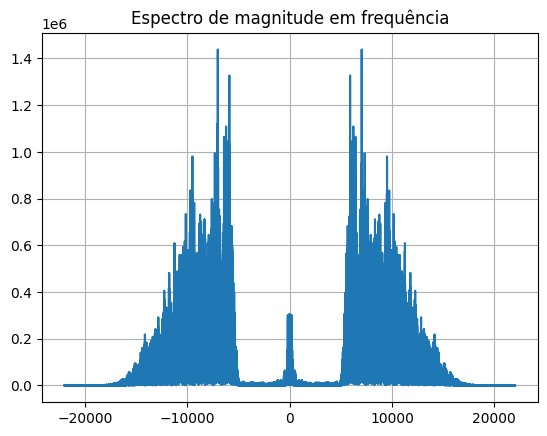

In [32]:
# DFT através do scipy
N = len(audio_agudo)
DFT_signal = fftpack.fft(audio_agudo,N)
mag_espectro = np.abs(DFT_signal)
f = fftpack.fftfreq(N, 1 / Fs)
plt.plot(fftpack.fftshift(f),fftpack.fftshift(mag_espectro))
plt.grid()
plt.title('Espectro de magnitude em frequência')

In [ ]:
N = len(audio_grave)
DFT_signal = fftpack.fft(audio_grave,N)
mag_espectro = np.abs(DFT_signal)
f = fftpack.fftfreq(N, 1 / Fs)
plt.plot(fftpack.fftshift(f),fftpack.fftshift(mag_espectro))
plt.grid()
plt.title('Espectro de magnitude em frequência')